# Домашняя работа №1. Купринов Кирилл, гр. ИАД-2

**Срок сдачи:** 9 октября 2017, 23:59 <br\>

При отправлении ДЗ в Dropbox указывайте фамилию в названии файла: <br\>
** IDA<Номер группы>HW1<Фамилия>.ipynb ** - например ** IDA1HW1Panov.ipynb **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('./titanium.csv')
df.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

In [5]:
scaler = StandardScaler()

In [6]:
# x_processed = (df['x'] - np.mean(df['x'])) / np.std(df['x'])
# y_processed = (df['y'] - np.mean(df['y'])) / np.std(df['y'])

x_processed = scaler.fit_transform(df['x'].values.reshape(-1, 1))
y = df['y'].values

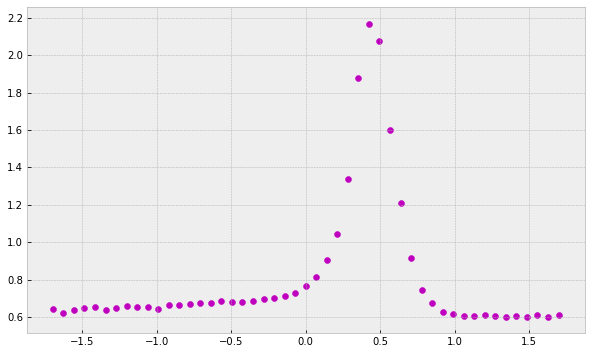

In [7]:
plt.scatter(x_processed, y, color='m');
plt.show()

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [8]:
EPSILON = 0.1
C = np.logspace(-4, 2, 10)

C = 0.000100		MAE = 0.190591
C = 0.000464		MAE = 0.192553
C = 0.002154		MAE = 0.196845
C = 0.010000		MAE = 0.197352
C = 0.046416		MAE = 0.197378
C = 0.215443		MAE = 0.197352
C = 1.000000		MAE = 0.197352
C = 4.641589		MAE = 0.197352
C = 21.544347		MAE = 0.197351
C = 100.000000		MAE = 0.197349

Min mae is 0.19059128061026806



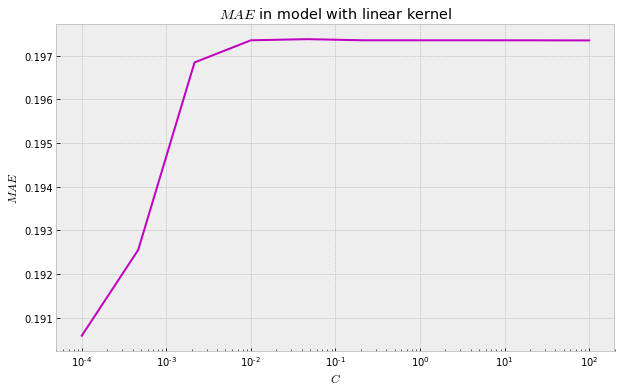

In [22]:
errors_lin = []
for c in C:
    clf = SVR(kernel = 'linear', C = c, epsilon = EPSILON)
    clf.fit(x_processed, y)
    errors_lin.append(mae(clf.predict(x_processed), np.ravel(y)))
    print('C = {c:6.6f}\t\tMAE = {mae:6.6f}'.format(c=c, mae=errors_lin[-1]))

print('\nMin mae is {}\n'.format(np.min(errors_lin)))

plt.title('$MAE$ in model with linear kernel')
plt.xscale('log')
plt.xlabel('$C$')
plt.ylabel('$MAE$')
plt.plot(C, np.array(errors_lin), color='m');
plt.show()

C = 0.000100		MAE = 0.188701
C = 0.000464		MAE = 0.185398
C = 0.002154		MAE = 0.172490
C = 0.010000		MAE = 0.172437
C = 0.046416		MAE = 0.173220
C = 0.215443		MAE = 0.173224
C = 1.000000		MAE = 0.173238
C = 4.641589		MAE = 0.173304
C = 21.544347		MAE = 0.173601
C = 100.000000		MAE = 0.174554

Min mae is 0.17243737071121493



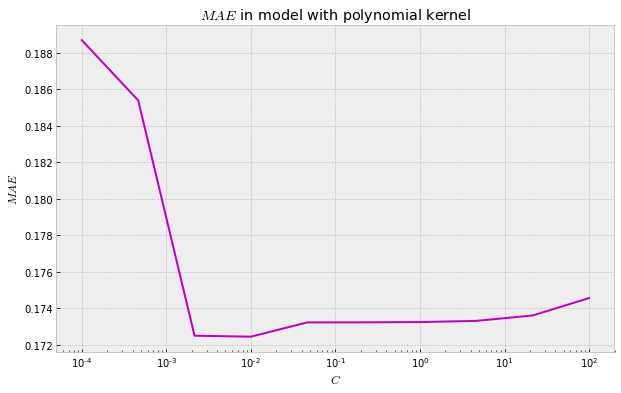

In [31]:
errors_poly = []
for c in C:
    clf = SVR(kernel = 'poly', C = c, epsilon = EPSILON, degree = 3, gamma = 6, coef0 = 1)
    clf.fit(x_processed, y)
    errors_poly.append(mae(clf.predict(x_processed), y))
    print('C = {c:6.6f}\t\tMAE = {mae:6.6f}'.format(c=c, mae=errors_poly[-1]))

print('\nMin mae is {}\n'.format(np.min(errors_poly)))

plt.title('$MAE$ in model with polynomial kernel')
plt.xscale('log')
plt.xlabel('$C$')
plt.ylabel('$MAE$')
plt.plot(C, np.array(errors_poly), color='m');
plt.show()

C = 0.000100		MAE = 0.189896
C = 0.000464		MAE = 0.189558
C = 0.002154		MAE = 0.189334
C = 0.010000		MAE = 0.187103
C = 0.046416		MAE = 0.168669
C = 0.215443		MAE = 0.124687
C = 1.000000		MAE = 0.098926
C = 4.641589		MAE = 0.080411
C = 21.544347		MAE = 0.072993
C = 100.000000		MAE = 0.072464

Min mae is 0.07246448598169641



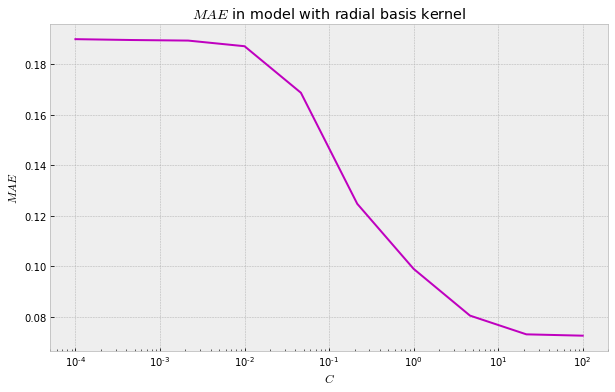

In [30]:
errors_rbf = []
for c in C:
    clf = SVR(kernel = 'rbf', C = c, epsilon = EPSILON, gamma = 6, coef0 = 1)
    clf.fit(x_processed, y)
    errors_rbf.append(mae(clf.predict(x_processed), y))
    print('C = {c:6.6f}\t\tMAE = {mae:6.6f}'.format(c=c, mae=errors_rbf[-1]))

print('\nMin mae is {}\n'.format(np.min(errors_rbf)))
    
plt.title('$MAE$ in model with radial basis kernel')
plt.xscale('log')
plt.xlabel('$C$')
plt.ylabel('$MAE$')
plt.plot(C, np.array(errors_rbf), color='m');
plt.show()

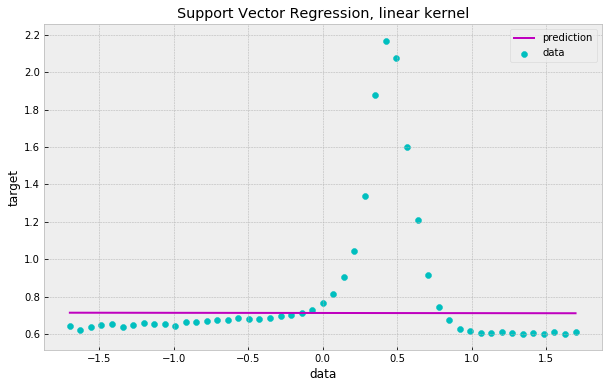

In [23]:
clf_ = SVR(kernel='linear', degree=1, C=C[0], epsilon=EPSILON)
clf_.fit(x_processed, y)

plt.title('Support Vector Regression, linear kernel')
plt.xlabel('data')
plt.ylabel('target')
plt.scatter(x_processed, y, color='c', label='data');
plt.plot(x_processed, clf_.predict(x_processed), color='m', label='prediction');
plt.legend()
plt.show()

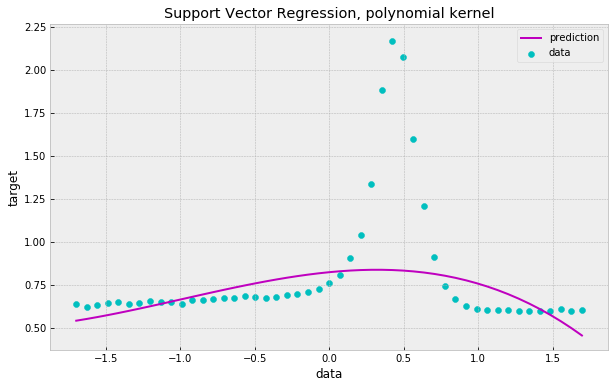

In [34]:
clf_ = SVR(kernel='poly', C=C[3], epsilon = EPSILON, degree = 3, gamma = 6, coef0 = 1)
clf_.fit(x_processed, y)

plt.title('Support Vector Regression, polynomial kernel')
plt.xlabel('data')
plt.ylabel('target')
plt.scatter(x_processed, y, color='c', label='data');
plt.plot(x_processed, clf_.predict(x_processed), color='m', label='prediction');
plt.legend()
plt.show()

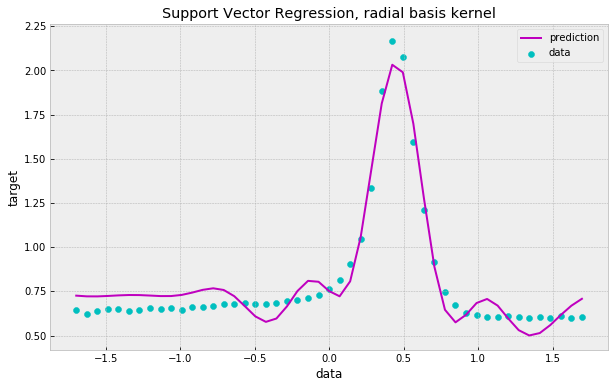

In [35]:
clf_ = SVR(kernel = 'rbf', C = C[-1], epsilon = EPSILON, gamma = 6, coef0 = 1)
clf_.fit(x_processed, y)

plt.title('Support Vector Regression, radial basis kernel')
plt.xlabel('data')
plt.ylabel('target')
plt.scatter(x_processed, y, color='c', label='data');
plt.plot(x_processed, clf_.predict(x_processed), color='m', label='prediction');
plt.legend()
plt.show()

При выборе линейного ядра модель недообучилась. 

При выборе RBF ядра - переобучилась.

Самый адекватный вариант получился с полиномиальным ядром.

Чем больше C, тем слабее параметр регуляризации, происходит переобучение (как в примере с ядром RBF). Чем C меньше, тем регуляризация сильнее, возникает недообучение (как с линейным ядром). 

# Определение языка слова (7 баллов)

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [91]:
def read_txt(name, label):
    df = pd.read_csv(name, header=None)
    df['label'] = label
    df.columns = ['word', 'label']
    return df

In [101]:
df_dict = read_txt('./war_and_peace_en.txt', 0).append(read_txt('./war_and_peace_es.txt', 1)).reset_index(drop=True)
df_dict.head()

,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

In [147]:
RND_SEED = 4118956

In [154]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df_dict['word']), 
                                                    np.array(df_dict['label']), 
                                                    test_size=0.2, 
                                                    random_state=RND_SEED)

In [215]:
def fit_predict (cv, svc):
    pl = Pipeline([('cv', cv), ('svm', svc)])
    pl.fit(X_train, y_train)
    return pl.predict(X_test)


def get_acc_score(predicted):
    return accuracy_score(predicted, y_test)

In [155]:
cv = CountVectorizer(analyzer='char')
svc = SVC(kernel='linear', random_state=RND_SEED)

In [211]:
pl = Pipeline([('cv', cv), ('svm', svc)])

In [157]:
pl.fit(X_train, y_train)
predicted = pl.predict(X_test)

In [158]:
accuracy_score(predicted, y_test)

0.78474353353792192

In [204]:
C = np.logspace(-3, 1, 5)
ngrams = [(2,2), (2,3), (2,4), (3,3)]

In [220]:
accs = []
for c in C:
    for ngram in ngrams:
        print ('- Testing C = {c:6.3f}\tngram_range = {ng}'.format(c=c, ng=ngram))
        cv = CountVectorizer(analyzer='char', ngram_range=ngram)
        svc = SVC(kernel='linear', C=c, random_state=RND_SEED)
        res = fit_predict(cv, svc)
        accs.append(get_acc_score(res))
        print('- Accuracy: {:3.5}\n'.format(accs[-1]))
print('\nMaximum accuracy is {}'.format(np.max(accs)))

- Testing C =  0.001	ngram_range = (2, 2)
- Accuracy: 0.60851

- Testing C =  0.001	ngram_range = (2, 3)
- Accuracy: 0.61947

- Testing C =  0.001	ngram_range = (2, 4)
- Accuracy: 0.62034

- Testing C =  0.001	ngram_range = (3, 3)
- Accuracy: 0.55458

- Testing C =  0.010	ngram_range = (2, 2)
- Accuracy: 0.83648

- Testing C =  0.010	ngram_range = (2, 3)
- Accuracy: 0.86716

- Testing C =  0.010	ngram_range = (2, 4)
- Accuracy: 0.87988

- Testing C =  0.010	ngram_range = (3, 3)
- Accuracy: 0.75274

- Testing C =  0.100	ngram_range = (2, 2)
- Accuracy: 0.88514

- Testing C =  0.100	ngram_range = (2, 3)
- Accuracy: 0.93029

- Testing C =  0.100	ngram_range = (2, 4)
- Accuracy: 0.94695

- Testing C =  0.100	ngram_range = (3, 3)
- Accuracy: 0.9167

- Testing C =  1.000	ngram_range = (2, 2)
- Accuracy: 0.90048

- Testing C =  1.000	ngram_range = (2, 3)
- Accuracy: 0.94388

- Testing C =  1.000	ngram_range = (2, 4)
- Accuracy: 0.94871

- Testing C =  1.000	ngram_range = (3, 3)
- Accuracy: 0.

## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

In [221]:
RND_SEED = 4118956

In [232]:
df_shuffled = df_dict.sample(frac=1, random_state=RND_SEED).reset_index(drop=True)
df_shuffled.head()

,word,label
0,spoke,0
1,nomin,1
2,lavoro,1
3,viso,1
4,having,0


In [233]:
df_shuffled.shape

(11403, 2)

In [236]:
df_shuffled = df_shuffled.iloc[0:1000, :]
df_shuffled.shape

(1000, 2)

In [267]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df_shuffled.index.values),
                                                    np.array(df_shuffled['label']),
                                                    test_size=.2,
                                                    random_state=RND_SEED)

### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [264]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]


In [273]:
def string_kernel(U, V):
    return [[np.exp(-wfi_levenshtein(u, v)**2) for u in df_shuffled.loc[U, 'word']] for v in df_shuffled.loc[V, 'word']]

In [298]:
G = string_kernel(X_train, X_train)

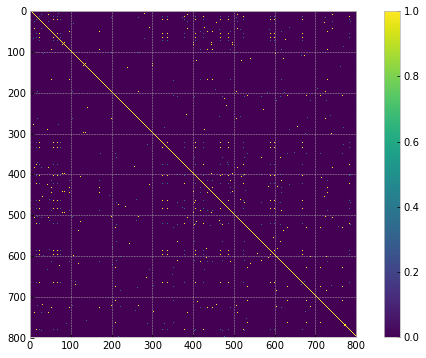

In [299]:
plt.imshow(G);
plt.colorbar()
plt.show()

### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [313]:
G_test = string_kernel(X_train, X_test)

In [300]:
C = np.logspace(-3, 2, 10)

In [310]:
accs = []
for c in C:
    print ('- Testing C = {:6.3f}'.format(c))
    clf = SVC(kernel='precomputed', C=c)
    clf.fit(G, y_train)
    res = clf.predict(G)
    accs.append(accuracy_score(res, y_train))
    print('- Accuracy: {:3.6}\n'.format(accs[-1]))
print('\nMaximum accuracy is {}'.format(np.max(accs)))

- Testing C =  0.001
- Accuracy: 0.55875

- Testing C =  0.004
- Accuracy: 0.55875

- Testing C =  0.013
- Accuracy: 0.55875

- Testing C =  0.046
- Accuracy: 0.59625

- Testing C =  0.167
- Accuracy: 0.67625

- Testing C =  0.599
- Accuracy: 0.98125

- Testing C =  2.154
- Accuracy: 0.98875

- Testing C =  7.743
- Accuracy: 0.98875

- Testing C = 27.826
- Accuracy: 0.98875

- Testing C = 100.000
- Accuracy: 0.98875


Maximum accuracy is 0.98875


In [311]:
c_chosen = 2.154

In [312]:
clf = SVC(kernel='precomputed', C=c_chosen)
clf.fit(G, y_train)

SVC(C=2.154, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [314]:
print (accuracy_score(y_train, clf.predict(G)))
print (accuracy_score(y_test, clf.predict(G_test)))

0.98875
0.78


Добились точности 78%.